In [1]:
import pandas as pd

In [24]:
df = pd.read_csv('/Users/gavin/Documents/Metis/Coursework/Project_4/dataframes/seven_topic_matrix.csv')
data = pd.read_csv('/Users/gavin/Documents/Metis/Coursework/Project_4/dataframes/COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv')

In [25]:
df['date'] = pd.to_datetime(df['date'])

In [26]:
data['date'] = pd.to_datetime(data['DATE_OF_INTEREST'])

In [27]:
data.drop('DATE_OF_INTEREST', axis=1, inplace=True)

In [28]:
data.head(10)

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,date
0,1,0,0,2020-02-29
1,1,1,0,2020-03-03
2,5,2,0,2020-03-04
3,3,8,0,2020-03-05
4,8,5,0,2020-03-06
5,7,6,0,2020-03-07
6,21,15,0,2020-03-08
7,57,30,0,2020-03-09
8,70,49,0,2020-03-10
9,155,73,1,2020-03-11


In [29]:
data['case_count_7_day'] = data.loc[:,'CASE_COUNT'].rolling(window=7).mean()
data['hosp_count_7_day'] = data.loc[:,'HOSPITALIZED_COUNT'].rolling(window=7).mean()
data['death_count_7_day'] = data.loc[:,'DEATH_COUNT'].rolling(window=7).mean()

In [30]:
data_merge = data[['date', 'case_count_7_day', 'hosp_count_7_day', 'death_count_7_day']]

In [31]:
df_1 = pd.merge(df, data_merge, how='inner', left_on='date', right_on='date')

In [32]:
df_1.head()

,date,Stats Driven Predictions & Planning,Politicized COVID Issues,Political Banter,Reopening,Essential Services,State Mandates,Enforcement & Opposition,Election Related COVID Commentary,case_count_7_day,hosp_count_7_day,death_count_7_day
0,2020-03-10,42,7,8,7,21,10,7,6,24.428571,16.428571,0.000000
1,2020-03-16,55,19,3,32,20,3,31,10,714.285714,146.857143,2.285714
2,2020-03-17,29,20,8,6,10,1,11,4,1054.571429,191.285714,3.428571
3,2020-03-18,31,4,6,5,16,5,9,4,1456.857143,251.000000,6.142857
4,2020-03-19,24,14,7,6,14,3,18,3,1935.428571,321.285714,9.571429


In [33]:
import matplotlib.pyplot as plt

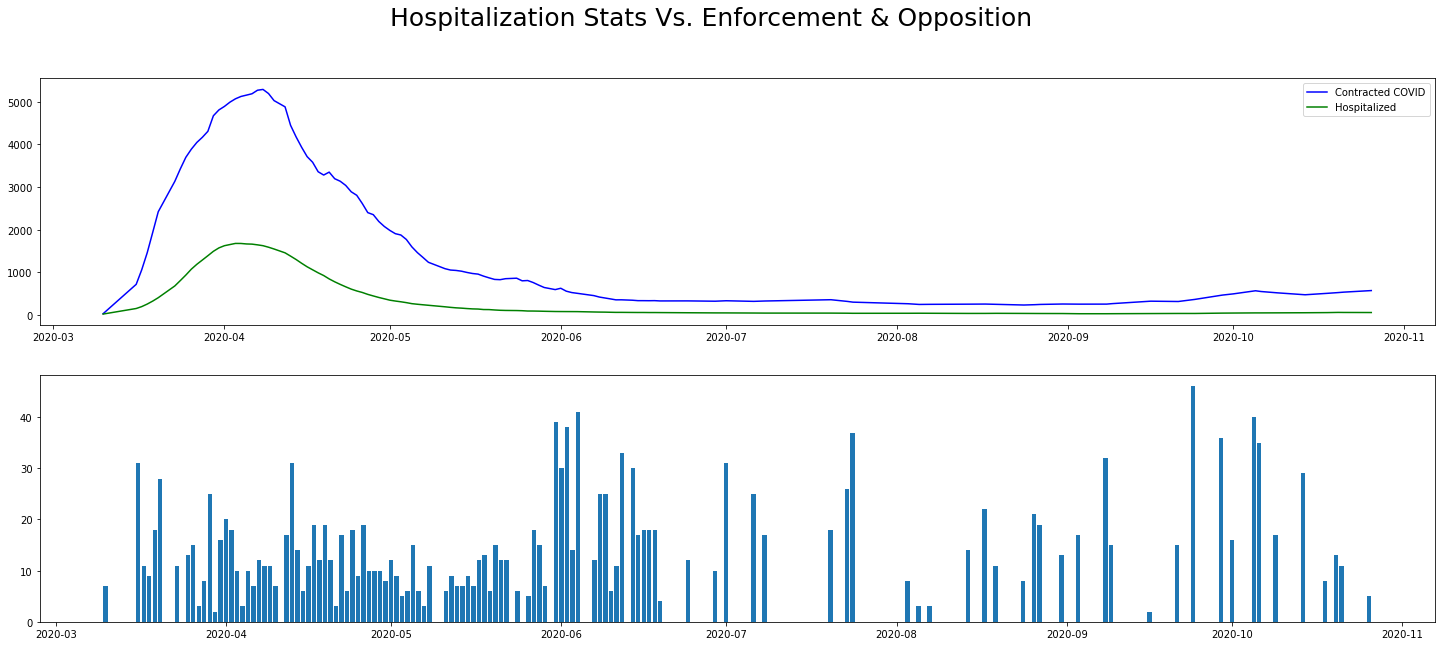

In [115]:
fig, axs = plt.subplots(2, figsize=(25,10))
fig.suptitle('Hospitalization Stats Vs. Enforcement & Opposition ', size=25)
axs[0].plot(df_1.date, df_1.case_count_7_day, c='blue')
axs[0].plot(df_1.date, df_1.hosp_count_7_day, c='green')
axs[0].legend(labels=['Contracted COVID', 'Hospitalized'])
axs[1].bar(df_1.date, df_1['Enforcement & Opposition']);

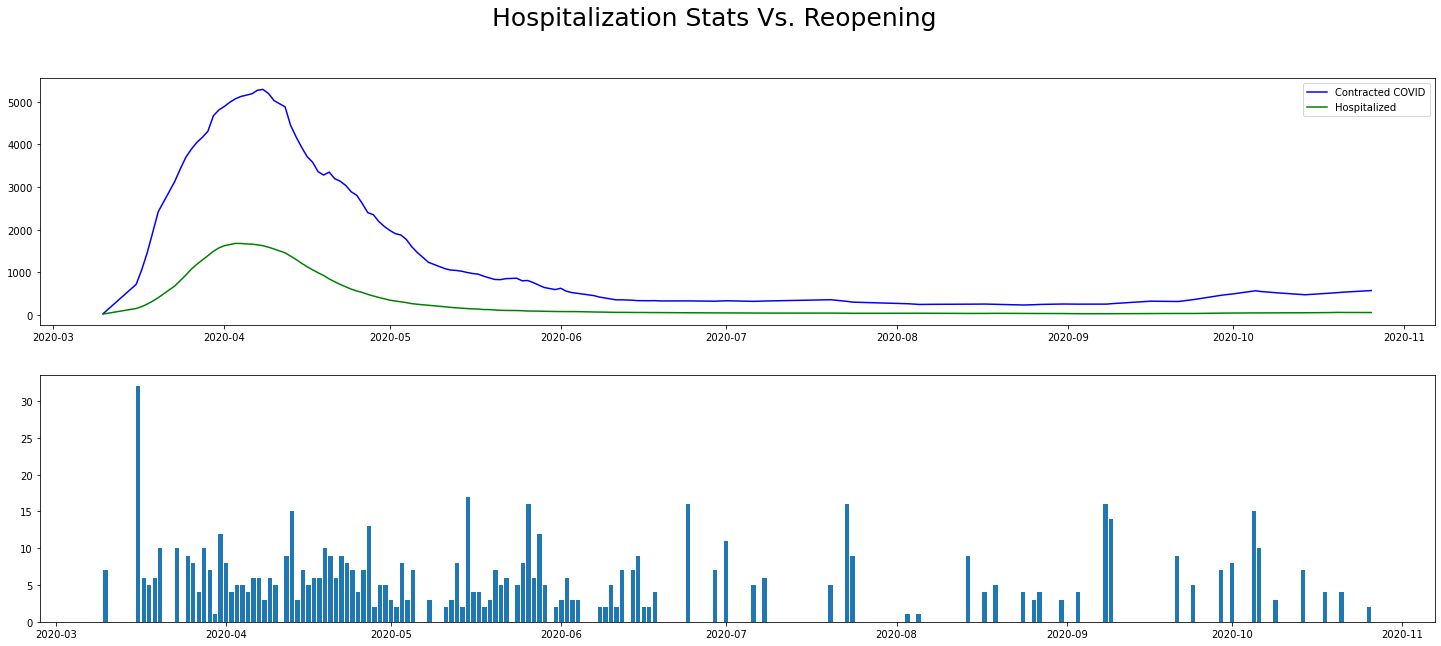

In [116]:
fig, axs = plt.subplots(2, figsize=(25,10))
fig.suptitle('Hospitalization Stats Vs. Reopening', size=25)
axs[0].plot(df_1.date, df_1.case_count_7_day, c='blue')
axs[0].plot(df_1.date, df_1.hosp_count_7_day, c='green')
axs[0].legend(labels=['Contracted COVID', 'Hospitalized'])
axs[1].bar(df_1.date, df_1['Reopening']);

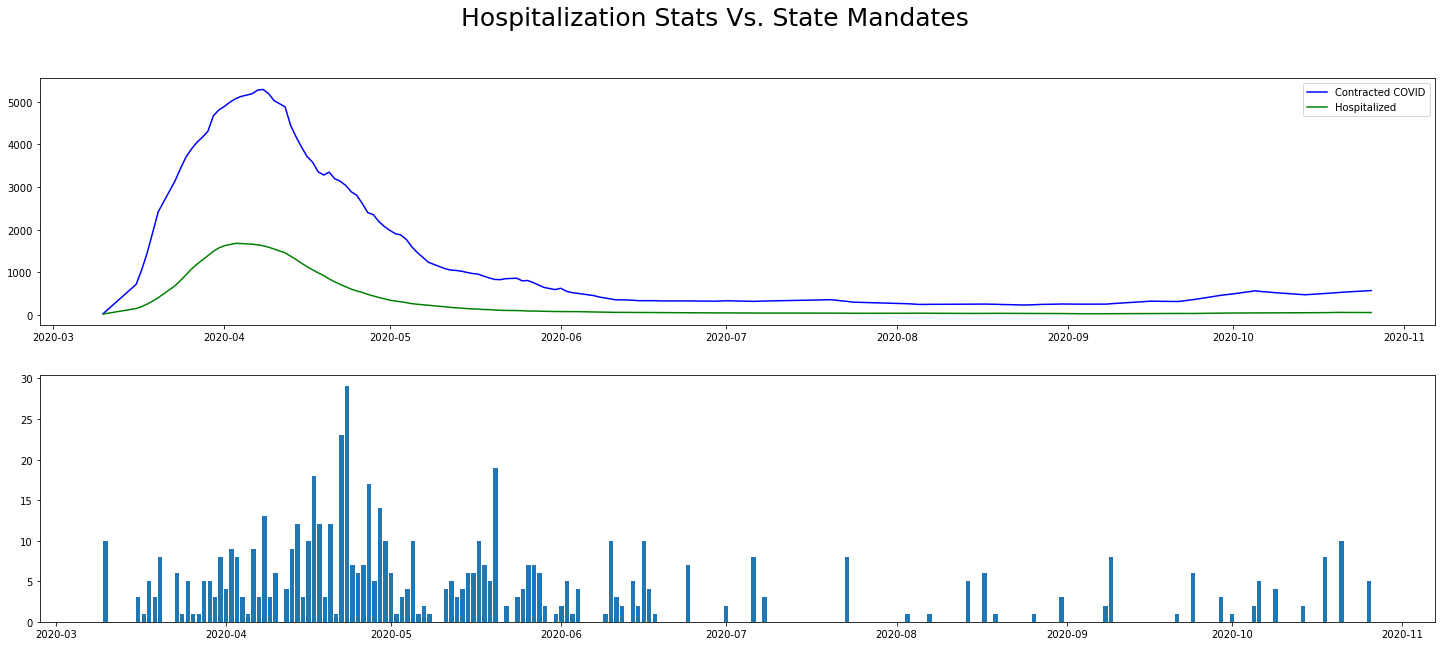

In [114]:
fig, axs = plt.subplots(2, figsize=(25,10))
fig.suptitle('Hospitalization Stats Vs. State Mandates', size=25)
axs[0].plot(df_1.date, df_1.case_count_7_day, c='blue')
axs[0].plot(df_1.date, df_1.hosp_count_7_day, c='green')
axs[0].legend(labels=['Contracted COVID', 'Hospitalized'])
axs[1].bar(df_1.date, df_1['State Mandates']);

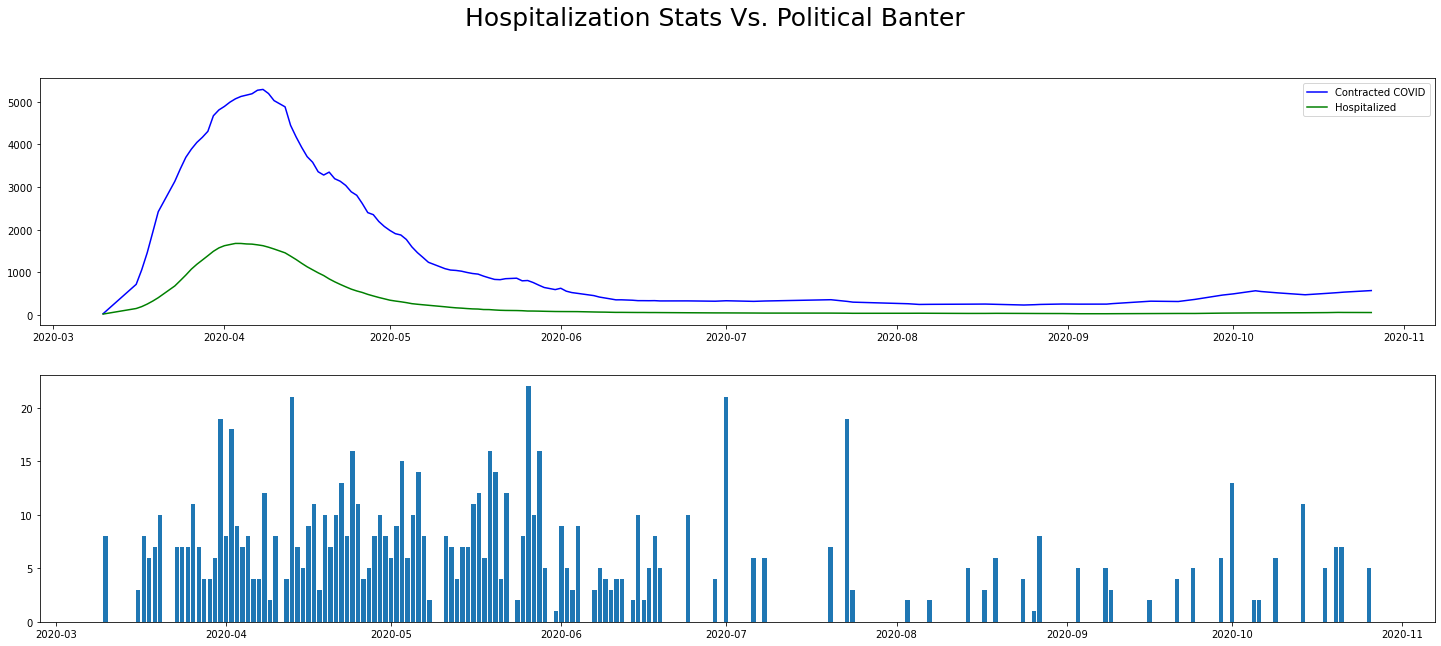

In [117]:
fig, axs = plt.subplots(2, figsize=(25,10))
fig.suptitle('Hospitalization Stats Vs. Political Banter', size=25)
axs[0].plot(df_1.date, df_1.case_count_7_day, c='blue')
axs[0].plot(df_1.date, df_1.hosp_count_7_day, c='green')
axs[0].legend(labels=['Contracted COVID', 'Hospitalized'])
axs[1].bar(df_1.date, df_1['Political Banter']);

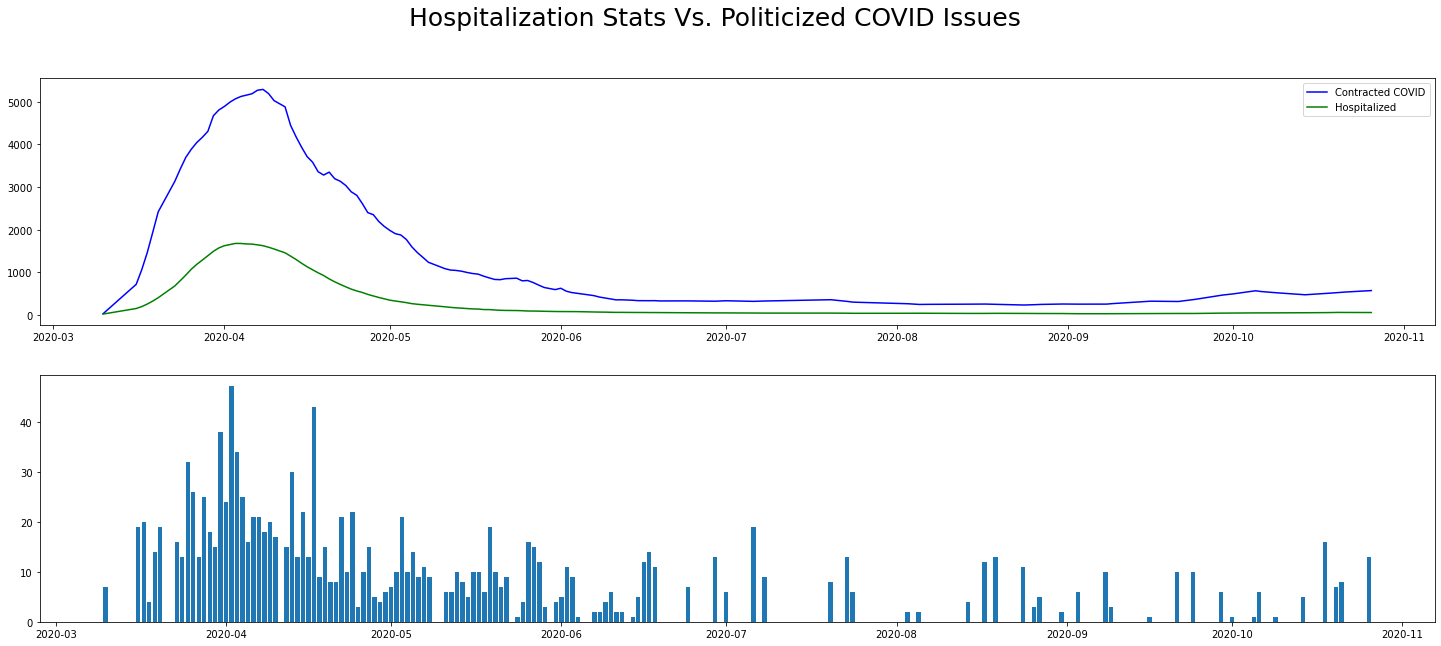

In [118]:
fig, axs = plt.subplots(2, figsize=(25,10))
fig.suptitle('Hospitalization Stats Vs. Politicized COVID Issues', size=25)
axs[0].plot(df_1.date, df_1.case_count_7_day, c='blue')
axs[0].plot(df_1.date, df_1.hosp_count_7_day, c='green')
axs[0].legend(labels=['Contracted COVID', 'Hospitalized'])
axs[1].bar(df_1.date, df_1['Politicized COVID Issues']);

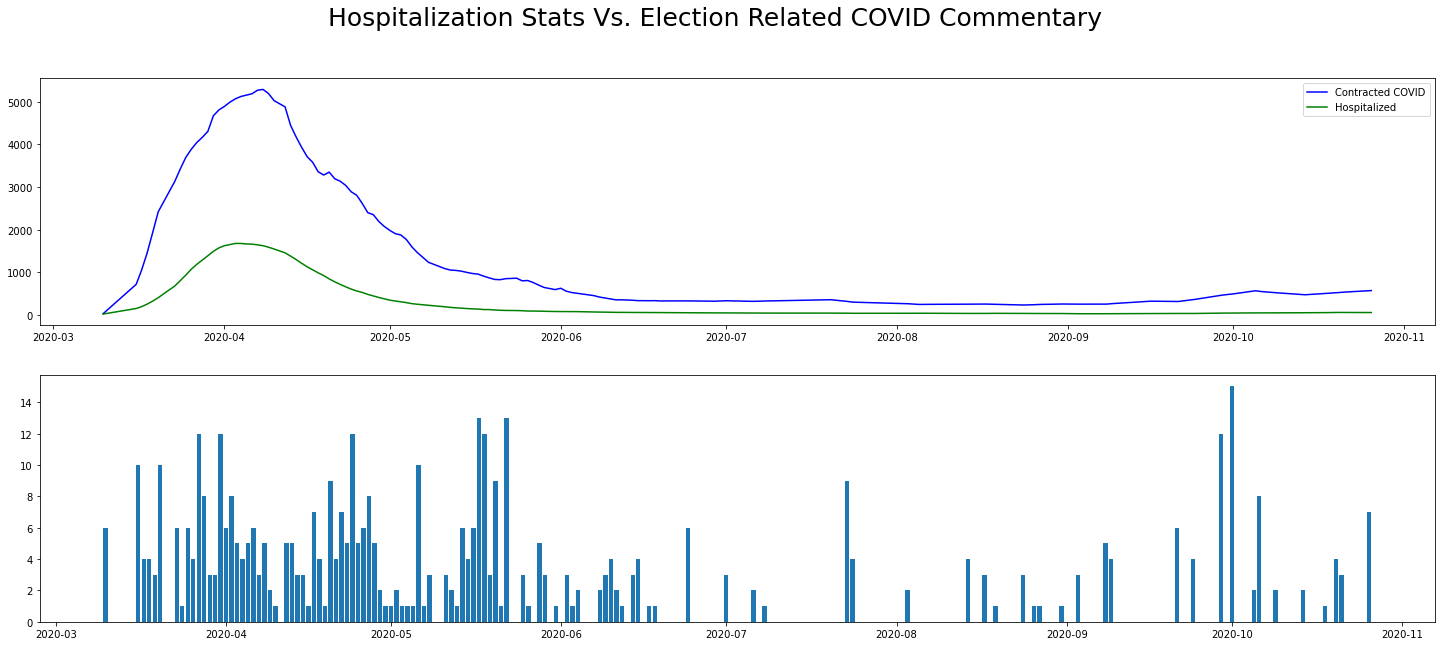

In [119]:
fig, axs = plt.subplots(2, figsize=(25,10))
fig.suptitle('Hospitalization Stats Vs. Election Related COVID Commentary', size=25)
axs[0].plot(df_1.date, df_1.case_count_7_day, c='blue')
axs[0].plot(df_1.date, df_1.hosp_count_7_day, c='green')
axs[0].legend(labels=['Contracted COVID', 'Hospitalized'])
axs[1].bar(df_1.date, df_1['Election Related COVID Commentary']);

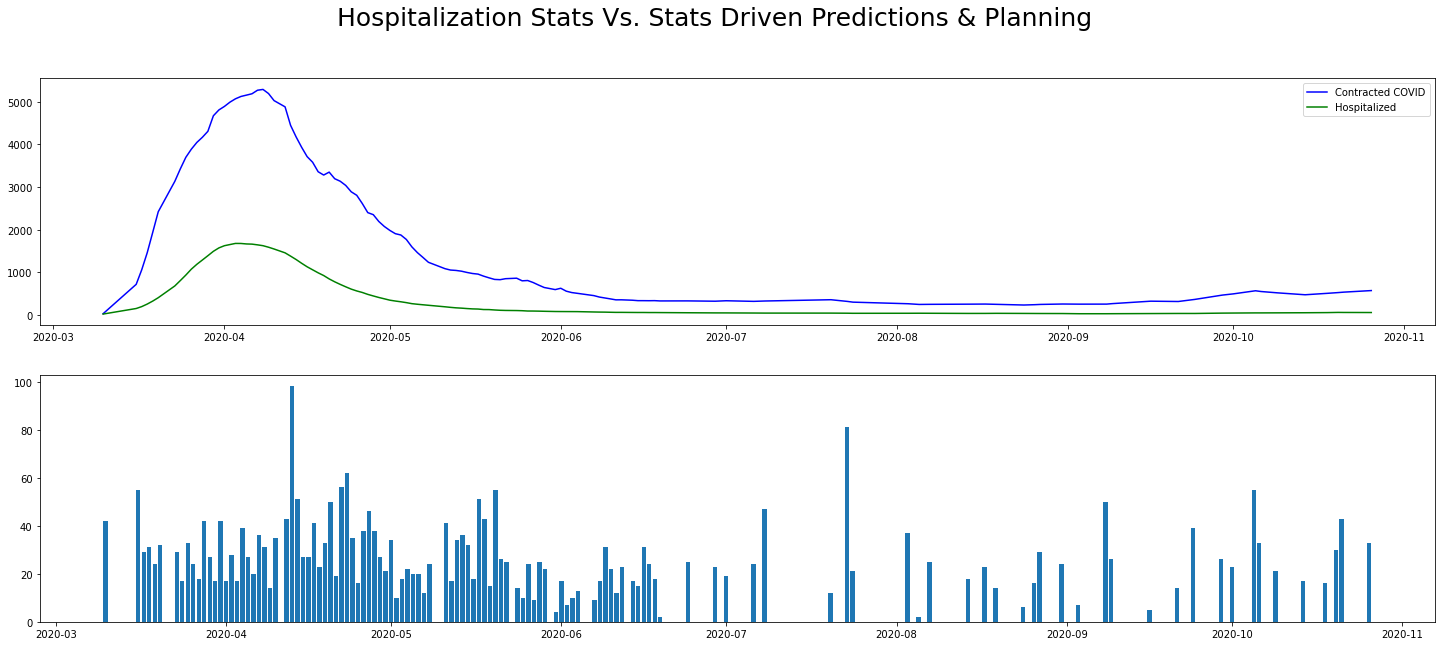

In [120]:
fig, axs = plt.subplots(2, figsize=(25,10))
fig.suptitle('Hospitalization Stats Vs. Stats Driven Predictions & Planning', size=25)
axs[0].plot(df_1.date, df_1.case_count_7_day, c='blue')
axs[0].plot(df_1.date, df_1.hosp_count_7_day, c='green')
axs[0].legend(labels=['Contracted COVID', 'Hospitalized'])
axs[1].bar(df_1.date, df_1['Stats Driven Predictions & Planning']);

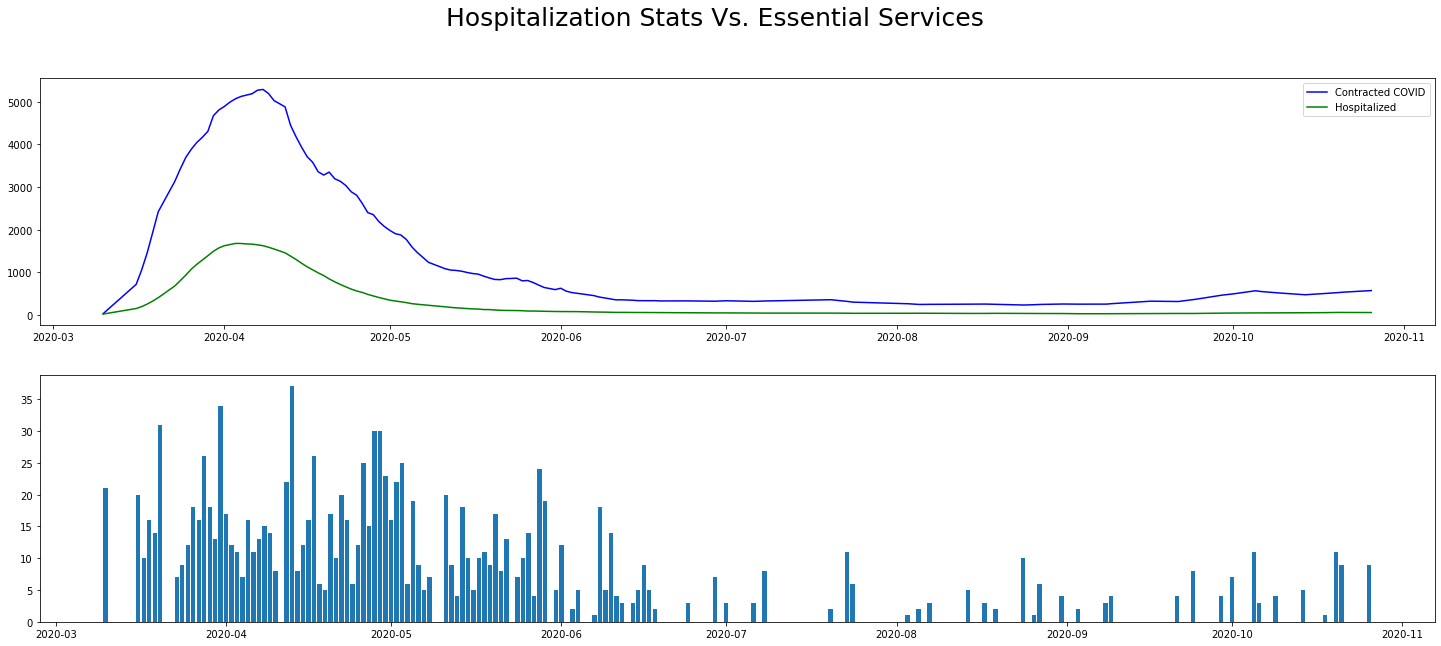

In [121]:
fig, axs = plt.subplots(2, figsize=(25,10))
fig.suptitle('Hospitalization Stats Vs. Essential Services', size=25)
axs[0].plot(df_1.date, df_1.case_count_7_day, c='blue')
axs[0].plot(df_1.date, df_1.hosp_count_7_day, c='green')
axs[0].legend(labels=['Contracted COVID', 'Hospitalized'])
axs[1].bar(df_1.date, df_1['Essential Services']);